In [142]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Data Set Description




# Description

In [76]:
#Inputs the data set
tips = sns.load_dataset("tips")


In [77]:
#Print first five lines
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [78]:
#Prints last five lines
tips.tail()


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [79]:
tips.shape

(244, 7)

In [80]:
#Utilise descriptive statistics
tips.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


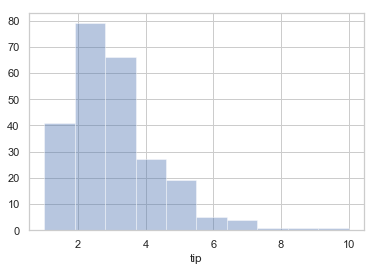

In [81]:
#Looking at a univariate distribution seaborn using the distplot() function. A histogram devised, a kernel density estimate (KDE) produced. We 
#Adapted https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.distplot(tips['tip'], kde=False, bins=10)

In [82]:
#A histogram will show the distribution of data by utilising bins and rugs which draw bars at points along to highlight the individual number of conclusions.
#Adapted from https://seaborn.pydata.org/tutorial/distributions.html
#sns.distplot(x, kde=False, rug=True)

In [83]:
#Obtains more information of the data type for each variable in our dataset
#Adapted from https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [84]:
#Obtains the mean and median of the total_bill
#Adapted from https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32
av= tips['tip'].mean()
print(av)

2.9982786885245902


In [85]:
medium = tips['tip'].median()
print(medium)

2.9


In [86]:
#Obtains and prints the standard deviation of the total_bill, which shows how the values deviate out form their mean.
#Adapted from https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32
stand_dev = tips['tip'].std()
print(stand_dev)

1.3836381890011826


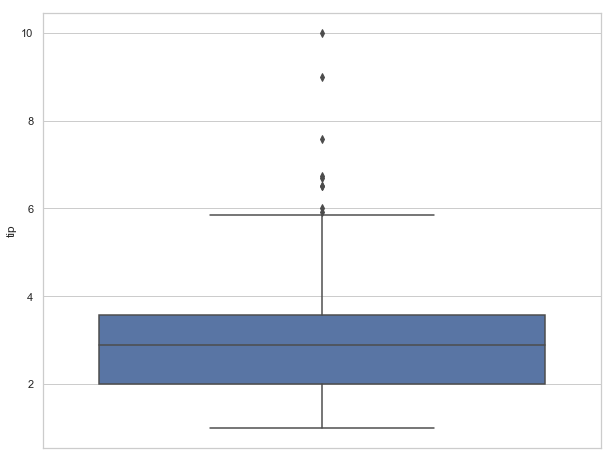

In [87]:
#
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='tip', data=tips, orient="v")

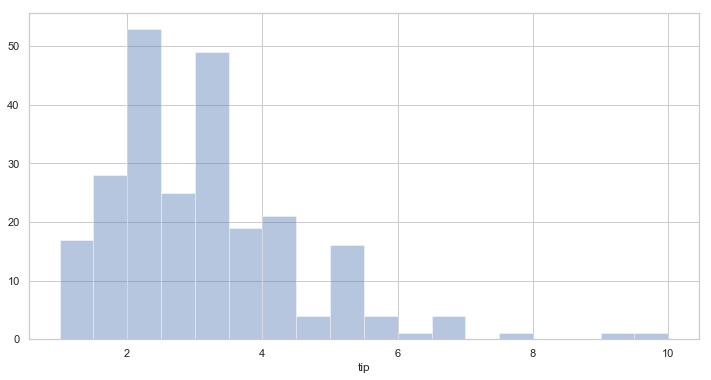

In [88]:
show_data = tips.dropna(subset=['tip'])
plt.figure(figsize=(12, 6))
sns.distplot(show_data['tip'], kde=False)

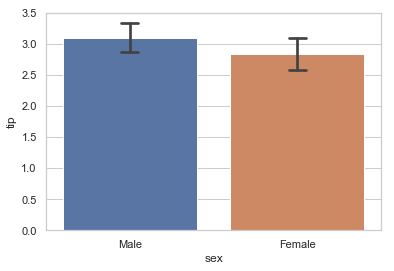

In [89]:
#A bar plot shows an assessment of central tendency in a numeric variable with the height of each rectangle and shows some of the uncertainty regarding estimates utilising error bars.
#Adapted from https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x= 'sex', y= 'tip', data = tips, capsize=.1)

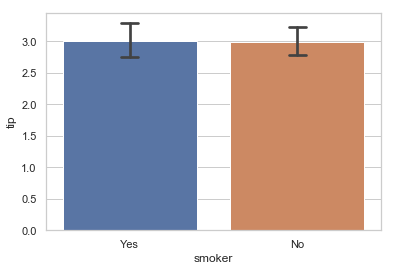

In [90]:
sns.barplot(x= 'smoker', y= 'tip', data = tips, capsize=.1)

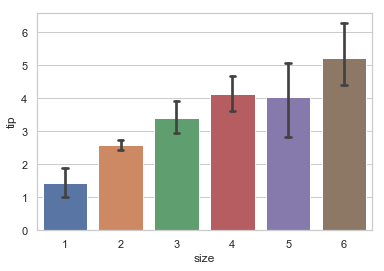

In [91]:
sns.barplot(x= 'size', y= 'tip', data = tips, capsize=.1)

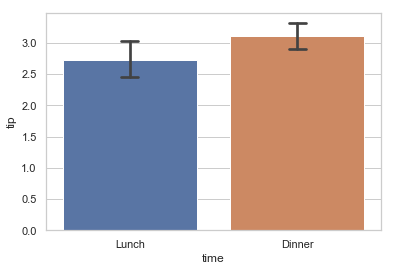

In [92]:
sns.barplot(x= 'time', y= 'tip', data = tips, capsize=.1)

# Regression

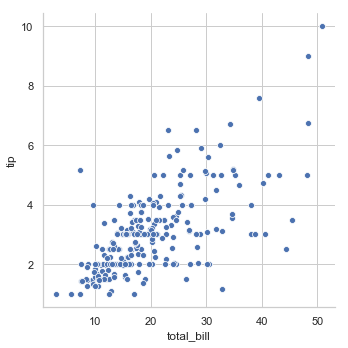

In [93]:
#Relplot allows us to draw a scatterplot comparing the variables of tips according to total_bill and informs if there is a relationship of these variables
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.relplot(x="total_bill", y="tip", data=tips)

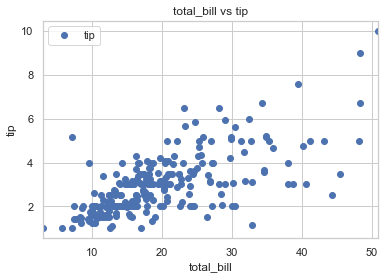

In [94]:
#plotting the data on a 2Dgraph to display the relationship between the variables
#Adapted from https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
tips.plot(x='total_bill', y='tip', style='o')  
plt.title('total_bill vs tip')  
plt.xlabel('total_bill')  
plt.ylabel('tip')  
plt.show()

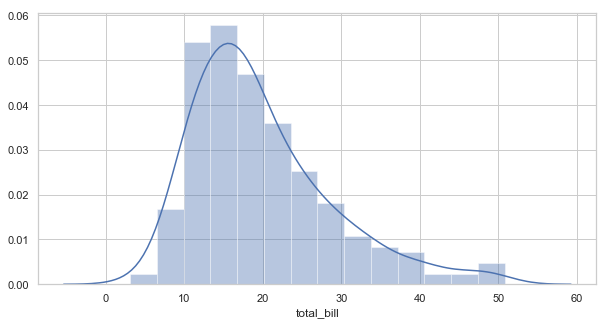

In [95]:
#plotting the average max total_bill
#Adapted from https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(tips['total_bill'])

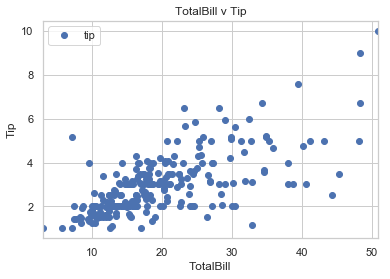

In [96]:
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
tips.plot(x='total_bill', y='tip', style='o')  
plt.title('TotalBill v Tip')  
plt.xlabel('TotalBill')  
plt.ylabel('Tip')  
plt.show()

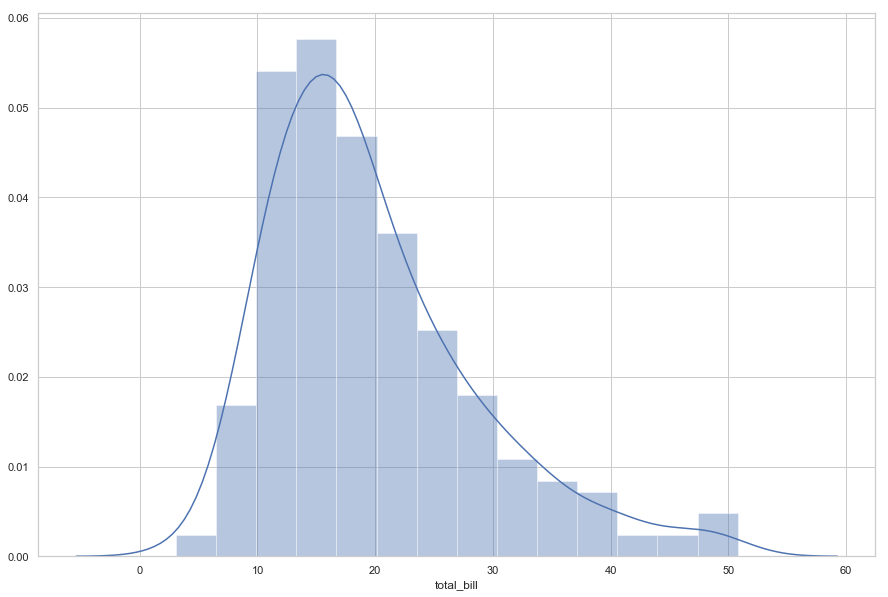

In [97]:
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(tips['total_bill'])

In [124]:
X = tips['total_bill'].values.reshape(-1,1)
y = tips['tip'].values.reshape(-1,1)



In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [126]:
#training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[1.02854395]
[[0.0968534]]


In [146]:
y_pred = regressor.predict(X_test)

In [157]:
tips = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
tips


,Actual,Predicted
0,2.64,2.732195
1,3.76,2.799993
2,3.51,2.916217
3,1.00,1.730731
4,2.50,2.604349
5,1.00,1.585451
6,3.08,2.764157
7,5.65,3.288134
8,3.50,2.786433
9,3.68,4.384514


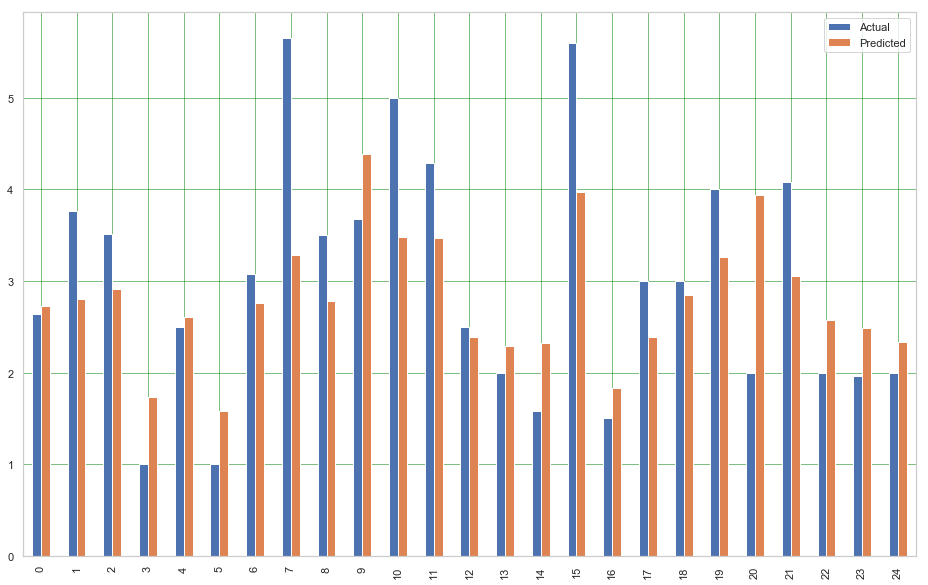

In [158]:
tips2= tips.head(25)
tips2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

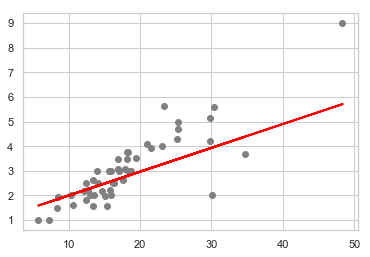

In [159]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [160]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6564074900962108
Mean Squared Error: 0.821309064276629
Root Mean Squared Error: 0.9062610353957787


# Analyse

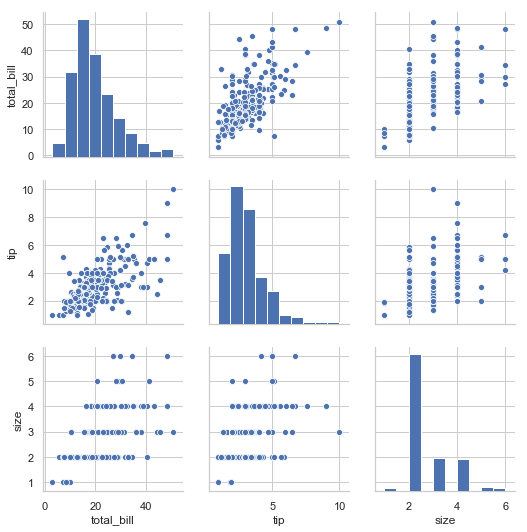

In [148]:
tips = sns.load_dataset("tips")
sns.pairplot(tips);

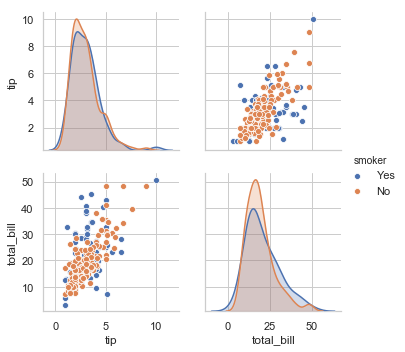

In [149]:
sns.pairplot(tips, vars=["tip", "total_bill"], hue='smoker' )

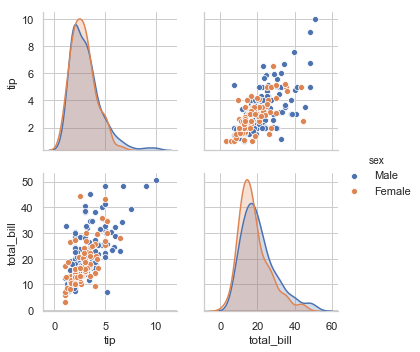

In [150]:
sns.pairplot(tips, vars=["tip", "total_bill"], hue='sex' )

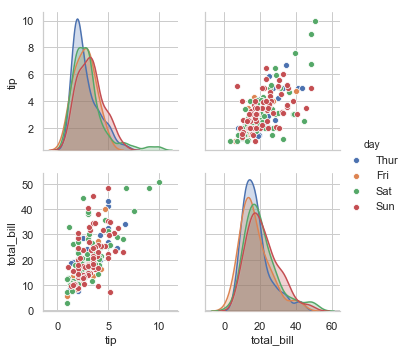

In [151]:
sns.pairplot(tips, vars=["tip", "total_bill"], hue='day' )

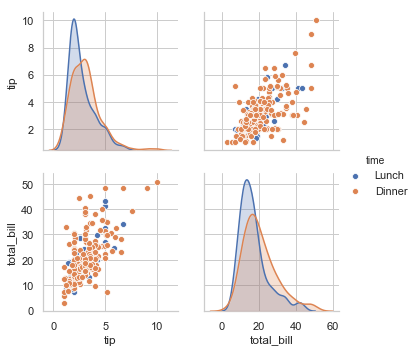

In [152]:
sns.pairplot(tips, vars=["tip", "total_bill"], hue='time' )

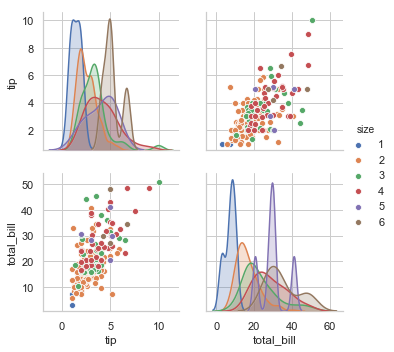

In [153]:
sns.pairplot(tips, vars=["tip", "total_bill"], hue='size' )

In [154]:
%matplotlib inline
